In [1]:
%load_ext autoreload
%autoreload 2
import json
import sys

In [2]:
WD="/home/varis/tspec-workdir/top-down-captioner-torch"

results = {
    "baseline": {},
    "baseline.linear": {},
    "baseline.linear-id": {},
    "baseline.linear-res": {},
    "baseline.constant": {}
}

sys.path.insert(0, WD)
from plot import plot_series

In [6]:
for exp in results.keys():
    EXPDIR = "{}/experiments.intersection/{}".format(WD, exp)
    for i in range(50):
        try:
            file = "{}/eval/BEST_{}checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar.emb.txt".format(EXPDIR, i)
            with open(file, "r") as fh:
                for line in fh:
                    line = line.strip().split()
                    key = "_".join(line[:-1])
                    val = line[-1].split("(")[0]
                    if key in results[exp]:
                        results[exp][key].append(float(val))
                    else:
                        results[exp][key] = [float(val)]
        except Exception as e:
            print(file)
        file = "{}/eval/BEST_{}checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar.out".format(EXPDIR, i)
        try:
            with open(file, "r") as fh:
                line = fh.readline().replace("\'", "\"")
                f_json = json.loads(line)
                for key in f_json:
                    val = f_json[key]
                    if key in results[exp]:
                        results[exp][key].append(float(val))
                    else:
                        results[exp][key] = [float(val)]
        except Exception as e:
            print(file)
            

/home/varis/tspec-workdir/top-down-captioner-torch/experiments.intersection/baseline.linear/eval/BEST_1checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar.out
/home/varis/tspec-workdir/top-down-captioner-torch/experiments.intersection/baseline.linear-id/eval/BEST_0checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar.out
/home/varis/tspec-workdir/top-down-captioner-torch/experiments.intersection/baseline.linear-id/eval/BEST_1checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar.out
/home/varis/tspec-workdir/top-down-captioner-torch/experiments.intersection/baseline.linear-id/eval/BEST_36checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar.out
/home/varis/tspec-workdir/top-down-captioner-torch/experiments.intersection/baseline.linear-res/eval/BEST_0checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar.emb.txt
/home/varis/tspec-workdir/top-down-captioner-torch/experiments.intersection/baseline.linear-res/eval/BEST_0checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar.out
/home/varis/

In [9]:
print(results["baseline"].keys())

dict_keys(['mNNO_(orig):', 'mNNO_(proj):', 'C_intra_(orig):', 'C_inter_(orig):', 'C_intra_(proj):', 'C_inter_(proj):', 'Pearson_(orig):', 'Pearson_(proj):', 'CIDEr', 'Bleu_4', 'Bleu_3', 'Bleu_2', 'Bleu_1', 'ROUGE_L', 'METEOR'])


KeyError: 'C_inter_(orig):'

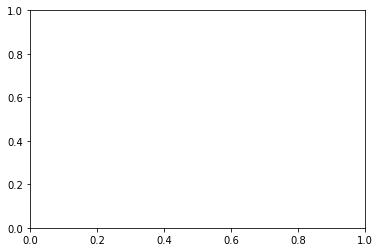

In [10]:
import matplotlib.pyplot as plt

exp1 = results["baseline"]
exp2 = results["baseline.linear"]
ax1 = plt.subplot(111)
#ax1 = plot_series(results['mNNO_(orig):'], ax=ax1, color="rx")
#ax1 = plot_series(results['mNNO_(proj):'], ax=ax1, color="gx")
#ax1 = plot_series(results['C_intra_(orig):'], ax=ax1, color="bx")
#ax1 = plot_series(results['C_intra_(proj):'], ax=ax1, color="bx")
ax1 = plot_series(results['C_inter_(orig):'], ax=ax1, color="bx")
ax1 = plot_series(results['C_inter_(proj):'], ax=ax1, color="bx")
plt.show()